In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/dog-vs-cat/dogvscat/test/0/272.jpg
/kaggle/input/dog-vs-cat/dogvscat/test/0/270.jpg
/kaggle/input/dog-vs-cat/dogvscat/test/0/253.jpg
/kaggle/input/dog-vs-cat/dogvscat/test/0/260.jpg
/kaggle/input/dog-vs-cat/dogvscat/test/0/273.jpg
/kaggle/input/dog-vs-cat/dogvscat/test/0/265.jpg
/kaggle/input/dog-vs-cat/dogvscat/test/0/271.jpg
/kaggle/input/dog-vs-cat/dogvscat/test/0/251.jpg
/kaggle/input/dog-vs-cat/dogvscat/test/0/274.jpg
/kaggle/input/dog-vs-cat/dogvscat/test/0/256.jpg
/kaggle/input/dog-vs-cat/dogvscat/test/0/254.jpg
/kaggle/input/dog-vs-cat/dogvscat/test/0/267.jpg
/kaggle/input/dog-vs-cat/dogvscat/test/0/252.jpg
/kaggle/input/dog-vs-cat/dogvscat/test/0/258.jpg
/kaggle/input/dog-vs-cat/dogvscat/test/0/261.jpg
/kaggle/input/dog-vs-cat/dogvscat/test/0/264.jpg
/kaggle/input/dog-vs-cat/dogvscat/test/0/269.jpg
/kaggle/input/dog-vs-cat/dogvscat/test/0/263.jpg
/kaggle/input/dog-vs-cat/dogvscat/test/0/255.jpg
/kaggle/input/dog-vs-cat/dogvscat/test/0/257.jpg
/kaggle/input/dog-vs

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

import keras
from keras.models import Sequential
from keras.layers import Conv2D,Flatten,Dense,MaxPooling2D,Dropout
from sklearn.metrics import accuracy_score

In [3]:
train_dir = '/kaggle/input/dog-vs-cat/dogvscat/train'
test_dir = '/kaggle/input/dog-vs-cat/dogvscat/test'

In [4]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir,target_size=(224,224),batch_size=20,class_mode='binary')
test_generator = test_datagen.flow_from_directory(test_dir,target_size=(224,224),batch_size=20,class_mode='binary')

Found 500 images belonging to 2 classes.
Found 50 images belonging to 2 classes.


Convolutional Neural Network

In [9]:
model = Sequential()

In [10]:
model.add(Conv2D(32,(3,3),activation='relu', input_shape=(224,224,3)))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [11]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 54, 54, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 26, 26, 128)      

In [12]:
from tensorflow.keras import optimizers
model.compile(loss='binary_crossentropy',optimizer=optimizers.RMSprop(learning_rate=1e-3), metrics=['accuracy'])

In [16]:
history = model.fit_generator(train_generator,steps_per_epoch=train_generator.samples//20,epochs=10,validation_data=test_generator,validation_steps=test_generator.samples//20)

/tmp/ipykernel_42/113228744.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_generator,steps_per_epoch=train_generator.samples//20,epochs=10,validation_data=test_generator,validation_steps=test_generator.samples//20)


Epoch 1/10
25/25 [==============================] - 35s 1s/step - loss: 0.6909 - accuracy: 0.5800 - val_loss: 0.6846 - val_accuracy: 0.5000
Epoch 2/10
25/25 [==============================] - 35s 1s/step - loss: 0.6656 - accuracy: 0.5940 - val_loss: 0.6694 - val_accuracy: 0.5500
Epoch 3/10
25/25 [==============================] - 36s 1s/step - loss: 0.6453 - accuracy: 0.6180 - val_loss: 0.6927 - val_accuracy: 0.5500
Epoch 4/10
25/25 [==============================] - 36s 1s/step - loss: 0.6822 - accuracy: 0.6460 - val_loss: 0.6566 - val_accuracy: 0.6750
Epoch 5/10
25/25 [==============================] - 37s 1s/step - loss: 0.6128 - accuracy: 0.6400 - val_loss: 0.6652 - val_accuracy: 0.5750
Epoch 6/10
25/25 [==============================] - 36s 1s/step - loss: 0.6315 - accuracy: 0.6620 - val_loss: 0.6216 - val_accuracy: 0.6750
Epoch 7/10
25/25 [==============================] - 35s 1s/step - loss: 0.5808 - accuracy: 0.7120 - val_loss: 0.7997 - val_accuracy: 0.5250
Epoch 8/10
25/25 [==

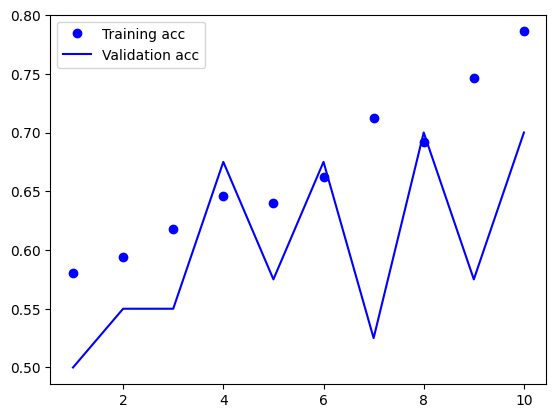

In [17]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1,len(acc)+1)
plt.plot(epochs,acc,'bo',label='Training acc')
plt.plot(epochs,val_acc,'b',label='Validation acc')
plt.legend()



plt.show()

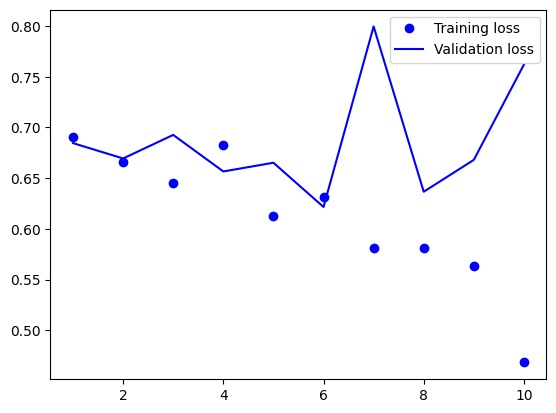

In [18]:
loss = history.history['loss']
val_loss = history.history['val_loss']
plt.plot(epochs,loss,'bo',label='Training loss')
plt.plot(epochs,val_loss,'b',label='Validation loss')
plt.legend()

In [19]:
model.save('catvsdog.h5')

/opt/conda/lib/python3.10/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


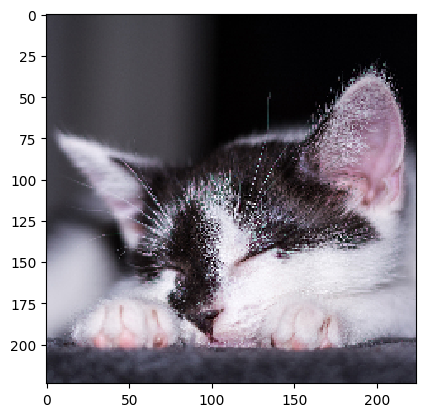

In [57]:
from tensorflow.keras.preprocessing import image
path ='/kaggle/input/dog-vs-cat/dogvscat/test/0/251.jpg'
img = image.load_img(path,target_size=(224,224))
plt.imshow(img,interpolation='nearest')
plt.show()

In [58]:
img_array = np.array(img)
img_array.shape

(224, 224, 3)

In [59]:
img_array=img_array.reshape(1,224,224,3)

In [ ]:
a = model.predict(img_array)
if a==[[1]]:
    print('dog')
else:
    print('cat')